# Tesla Stock Analysis

## About this Project and Me

Hello, my name is Joseph Kemper. I am a Business Management student with an emphasis in Computer Programming. My goal behind choosing this project is to demonstrate what I am capable of and to build my skills for future projects. Future projects I have planned involve a large amount of data analysis and this project will serve as a good stepping stone to my long term goals. 

Goal of Analysis: Find what if any patterns that exist in Tesla Stock performance.

# Data Preparation

In [12]:
import pandas
import matplotlib.pyplot as plt 
import numpy
%matplotlib inline

# Load data into DataFrame
raw_data = pandas.read_csv ("RawData.csv")

# Make Copy of data to clean
cleaned_data = raw_data

# Prep list of columns to remove dollar sign from
columns_to_clean = ["Close/Last","Open","High","Low"]

# Loop over columns and remove all dollar signs and set all numbers as float
for column in columns_to_clean:
    cleaned_data [column] = cleaned_data [column].replace({"\$":""}, regex=True).astype(float)

# Convert data in "Date" column to a date data type
cleaned_data ["Date"] = pandas.to_datetime(cleaned_data["Date"])

# Convert data in "Volume" column to Int64 to better handle large numbers while allowing for the data to handle nullable values
cleaned_data ["Volume"] = cleaned_data["Volume"].astype("int64")

# Save the cleaned data to a new CSV file
cleaned_data.to_csv ("CleanedData.csv", index=False, encoding="utf-8")

# Get the summary statistics
raw_summary = cleaned_data.describe()

# Print the summary
print(raw_summary)

                                Date   Close/Last        Volume         Open  \
count                           2516  2516.000000  2.516000e+03  2516.000000   
mean   2018-11-01 12:19:27.567567360    90.346463  1.141232e+08    90.378079   
min              2013-11-01 00:00:00     8.033300  1.065415e+07     7.958700   
25%              2016-05-03 18:00:00    15.488975  6.623726e+07    15.518825   
50%              2018-10-30 12:00:00    21.321650  9.307683e+07    21.264700   
75%              2021-05-03 06:00:00   190.947450  1.340551e+08   191.469950   
max              2023-10-31 00:00:00   409.970000  9.140809e+08   411.470000   
std                              NaN   107.398548  7.681395e+07   107.498260   

              High          Low  
count  2516.000000  2516.000000  
mean     92.434231    88.214102  
min       8.181300     7.740000  
25%      15.751825    15.235850  
50%      21.644300    20.922350  
75%     196.258325   186.032500  
max     414.496600   405.666600  
std    

# Data Preparation

In [13]:
prepped_data = cleaned_data
# Adding  measure (defined as High - Low) Column
prepped_data ["DailyRange"] = round(prepped_data["High"] - prepped_data["Low"],2)
# Adding average price between high and low values
prepped_data ["HighLowAverage"] = round((prepped_data["High"] + prepped_data["Low"])/2,2)
# Adding column to track days stock gained value
prepped_data ["GainedValue"] = prepped_data ["Close/Last"] - prepped_data["Open"] > 0
# Create column containing the day of the week
prepped_data ["DayOfWeek"] = prepped_data["Date"].dt.day_name()
# Create column containing the name of the month
prepped_data ["Month"] = prepped_data["Date"].dt.month_name()
# Create column containing month abbreviation
prepped_data ["MonthAbbr"] = prepped_data["Month"].str.slice(0,3)
# Create column containing the week of the year
prepped_data ["WeekNumber"] = prepped_data["Date"].dt.isocalendar().week
# Create column containing the calendar quarter
prepped_data ["Quarter"] = prepped_data["Date"].dt.quarter
# Create column containing day of the month
prepped_data ["DayOfMonth"] = prepped_data["Date"].dt.day
# Create column containing day of the year
prepped_data ["DayOfYear"] = prepped_data["Date"].dt.dayofyear

prepped_data.to_csv("PreppedData.csv", index=False, encoding="utf-8")

prepped_summary = prepped_data.describe()
print(prepped_summary)

                                Date   Close/Last        Volume         Open  \
count                           2516  2516.000000  2.516000e+03  2516.000000   
mean   2018-11-01 12:19:27.567567360    90.346463  1.141232e+08    90.378079   
min              2013-11-01 00:00:00     8.033300  1.065415e+07     7.958700   
25%              2016-05-03 18:00:00    15.488975  6.623726e+07    15.518825   
50%              2018-10-30 12:00:00    21.321650  9.307683e+07    21.264700   
75%              2021-05-03 06:00:00   190.947450  1.340551e+08   191.469950   
max              2023-10-31 00:00:00   409.970000  9.140809e+08   411.470000   
std                              NaN   107.398548  7.681395e+07   107.498260   

              High          Low   DailyRange  HighLowAverage  WeekNumber  \
count  2516.000000  2516.000000  2516.000000     2516.000000      2516.0   
mean     92.434231    88.214102     4.220242       90.324098   26.641097   
min       8.181300     7.740000     0.140000       

# Data Visualization

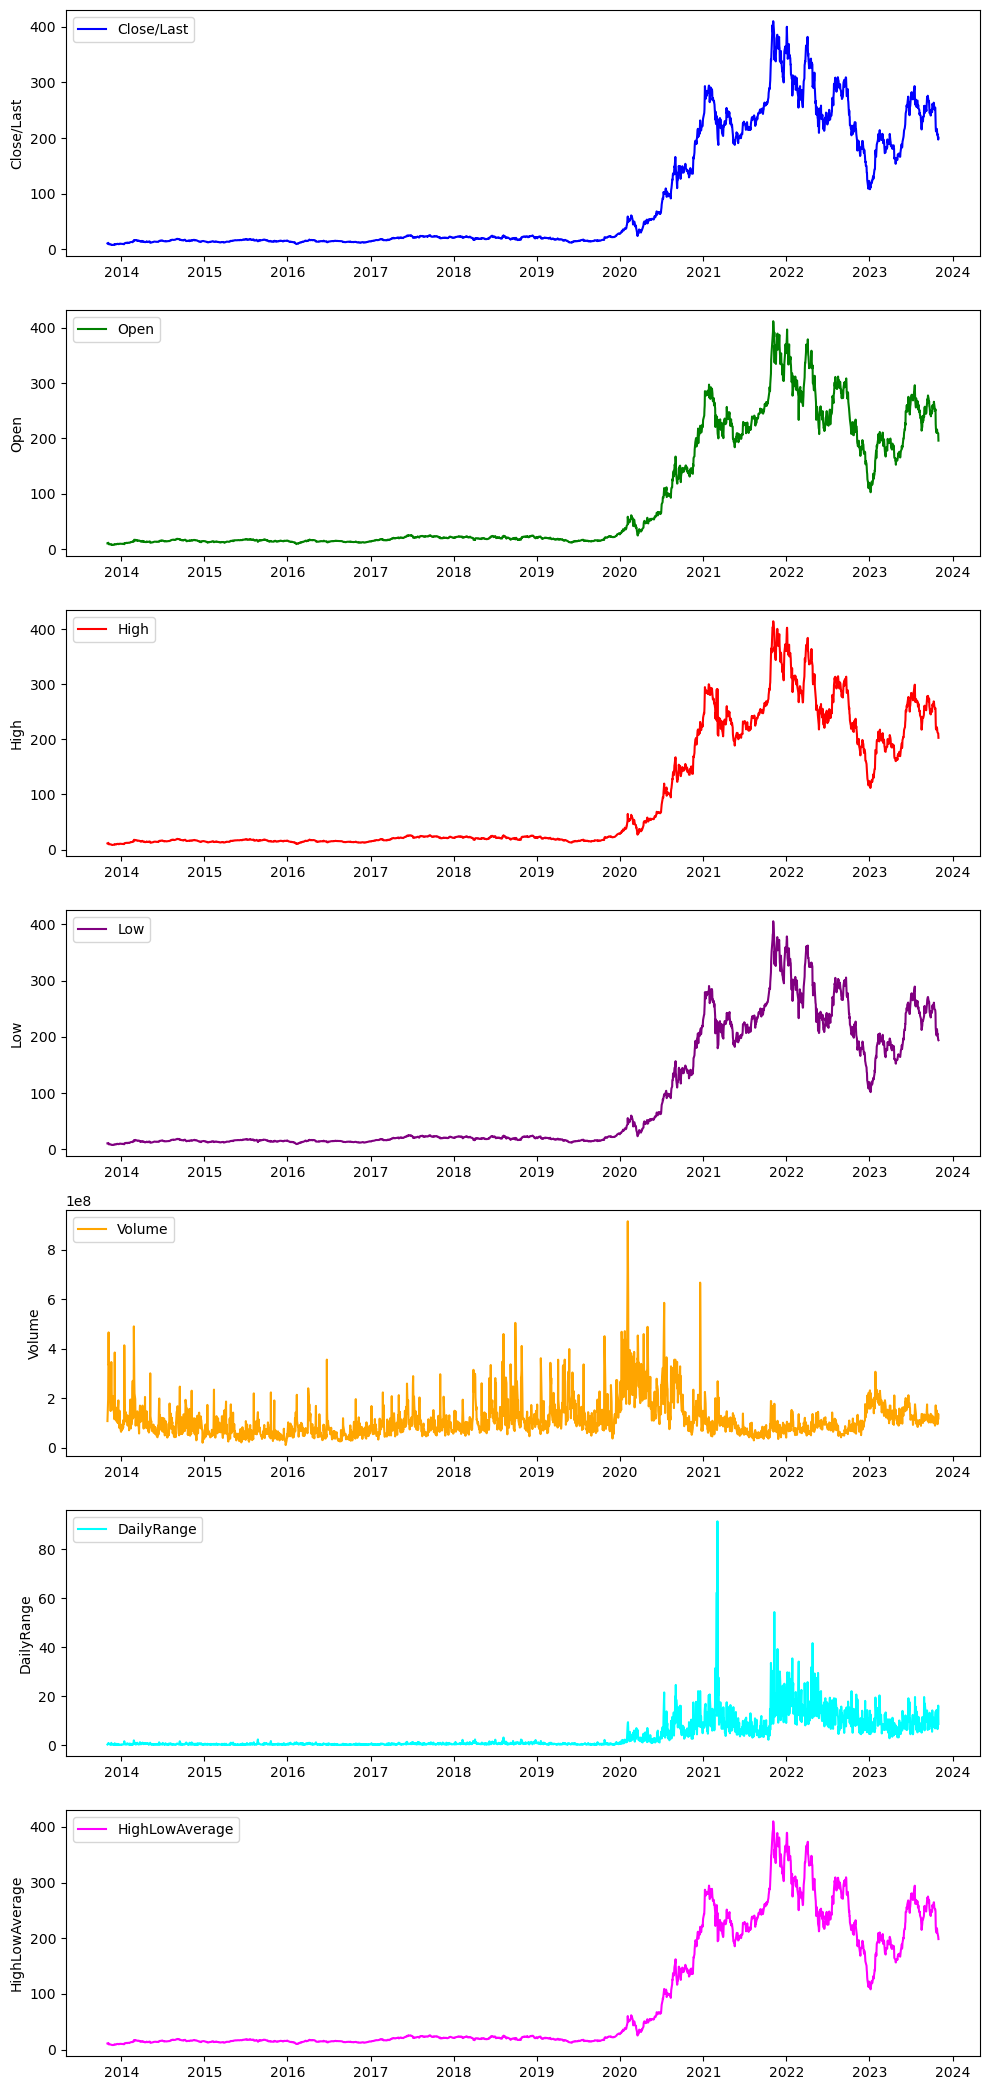

In [23]:
# Create base figure and subplots
figure, subplot_array = plt.subplots(7, sharex=False, figsize=(10,21))

# Plot the "Close/Last" values on the first subplot
close_subplot = subplot_array[0]
close_subplot.plot(prepped_data["Date"], prepped_data["Close/Last"], label="Close/Last", color="blue")
close_subplot.set_ylabel("Close/Last")
close_subplot.legend(loc="upper left")

# Plot the "Open" values on the second subplot
open_subplot = subplot_array[1]
open_subplot.plot(prepped_data["Date"], prepped_data["Open"], label="Open", color="green")
open_subplot.set_ylabel("Open")
open_subplot.legend(loc="upper left")

# Plot the "High" values on the third subplot
high_subplot = subplot_array[2]
high_subplot.plot(prepped_data["Date"], prepped_data["High"], label="High", color="red")
high_subplot.set_ylabel("High")
high_subplot.legend(loc="upper left")

# Plot the "Low" values on the fourth subplot
low_subplot = subplot_array[3]
low_subplot.plot(prepped_data["Date"], prepped_data["Low"], label="Low", color="purple")
low_subplot.set_ylabel("Low")
low_subplot.legend(loc="upper left")

# Plot the "Volume" values on the fifth subplot
volume_subplot = subplot_array[4]
volume_subplot.plot(prepped_data["Date"], prepped_data["Volume"], label="Volume", color="orange")
volume_subplot.set_ylabel("Volume")
volume_subplot.legend(loc="upper left")

# Plot the "DailyRange" values on the sixth subplot
daily_range_subplot = subplot_array[5]
daily_range_subplot.plot(prepped_data["Date"], prepped_data["DailyRange"], label="DailyRange", color="cyan")
daily_range_subplot.set_ylabel("DailyRange")
daily_range_subplot.legend(loc="upper left")

# Plot the "HighLowAverage" values on the seventh subplot
average_subplot = subplot_array[6]
average_subplot.plot(prepped_data["Date"], prepped_data["HighLowAverage"], label="HighLowAverage", color="magenta")
average_subplot.set_ylabel("HighLowAverage")
average_subplot.legend(loc="upper left")

plt.tight_layout()
plt.show()



# Data Summarization

Count of the unique values in the data

In [15]:
# List of columns in data
columns_to_count = ["Date","Close/Last","Volume","Open","High","Low","DailyRange","HighLowAverage","GainedValue","DayOfWeek","Month","MonthAbbr","WeekNumber","Quarter","DayOfMonth","DayOfYear"]

# Create a new DataFrame to store values
data_point_summary = pandas.DataFrame(columns=["Column", "UniqueValues"])

# Loop over columns and count each unique data point
for column in columns_to_count:
    number_unique_values = prepped_data[column].nunique()
    new_row = pandas.DataFrame({"Column": column, "UniqueValues": number_unique_values}, index=[0])
    data_point_summary = pandas.concat([data_point_summary, new_row], ignore_index=True)

# Show DataFrame
print (data_point_summary)

            Column UniqueValues
0             Date         2516
1       Close/Last         2450
2           Volume         2516
3             Open         2391
4             High         2377
5              Low         2401
6       DailyRange          872
7   HighLowAverage         1860
8      GainedValue            2
9        DayOfWeek            5
10           Month           12
11       MonthAbbr           12
12      WeekNumber           53
13         Quarter            4
14      DayOfMonth           31
15       DayOfYear          364


In [16]:
# Functions for use in multiple checks
# Filter for days where a DailyRange also ended with a gain in value
def days_above_threshold_check (threshold, column_name):
    days_above_threshold_and_gained = prepped_data[(prepped_data[column_name] > threshold) & (prepped_data ["GainedValue"] == True)]
    days_above_threshold_and_lost = prepped_data[(prepped_data[column_name] > threshold) & (prepped_data ["GainedValue"] == False)]
    num_days_above_threshold_and_gained = len(days_above_threshold_and_gained)
    num_days_above_threshold_and_lost = len(days_above_threshold_and_lost)
    return (num_days_above_threshold_and_gained, num_days_above_threshold_and_lost)

# Check for correlation above a certain threshold
def correlation_to_close_check (threshold, column_name):
    # Filter for data above the threshold
    above_threshold_data = prepped_data[prepped_data[column_name] > threshold]

    # Calculate correlation on this data
    correlation = above_threshold_data[column_name].corr(above_threshold_data["Close/Last"]).round(5)
    return correlation

def print_results(threshold, current_column, quartile_name, value_being_checked):
    correlation_check = correlation_to_close_check(threshold, current_column)
    threshold_check_results = days_above_threshold_check(threshold, current_column)

    print(f"Results of analysis of data above the {quartile_name} Quartile")
    print(f"Days above the {quartile_name} Quartile {value_being_checked} and gained value: {threshold_check_results[0]}")
    print(f"Days above the {quartile_name} Quartile {value_being_checked} and lost value: {threshold_check_results[1]}")
    print(f"The correlation between the {current_column} and Closing/Last price for data above the {quartile_name} Quartile is {correlation_check}")
    print()


#### Question 1: Is a large daily range (a large gap between the high and low prices for the day) good for Tesla closing prices?

In [17]:
# Get DailyRange statistics
daily_range_summary = prepped_data["DailyRange"].describe()
mean_daily_range = daily_range_summary["mean"]
std_daily_range = daily_range_summary["std"]
min_daily_range = daily_range_summary["min"]
first_quartile_daily_range = daily_range_summary["25%"]
median_daily_range = daily_range_summary["50%"]
third_quartile_daily_range = daily_range_summary["75%"]
max_daily_range = daily_range_summary["max"]
daily_range_mode = prepped_data["DailyRange"].mode()
daily_range_counts = prepped_data["DailyRange"].value_counts()

print(daily_range_summary)
print(f"Mode {daily_range_mode[0]} with {daily_range_counts[daily_range_mode[0]]} occurrences") 

count    2516.000000
mean        4.220242
std         6.351198
min         0.140000
25%         0.460000
50%         0.810000
75%         6.920000
max        91.310000
Name: DailyRange, dtype: float64
Mode 0.37 with 44 occurrences


The DailyRange data subset contains 2,516 data points. The average (mean) value is approximately 4.22. The standard deviation, is 6.35. The minimum value is 0.14, while the maximum value is 91.31. All data points can be found within that range. The first quartile of data (representing the lowest 25% of values) is 0.46. The second quartile is 0.81. The third quartile is 6.92. Right a way, this tells us that historically, on 75% of days, Tesla stock is has a less than $7 difference between the high and low prices, and only in 25% of days, does larger gaps exist between the high and low prices. 

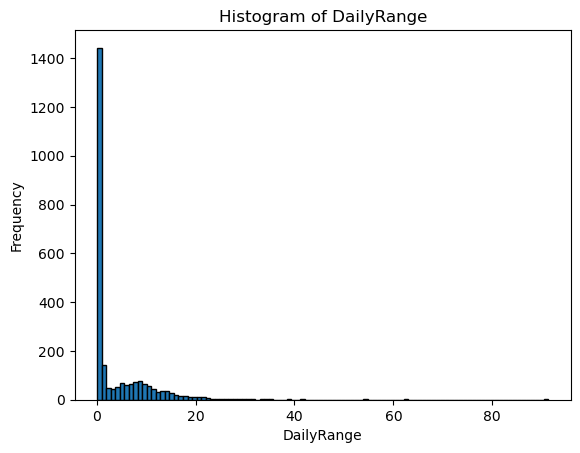

In [18]:
# Create Histogram of "DailyRange" column
plt.hist(prepped_data["DailyRange"], bins=100, edgecolor="black")

# Add title and labels
plt.title("Histogram of DailyRange")
plt.xlabel("DailyRange")
plt.ylabel("Frequency")

plt.show()

In [19]:
# Comparison value
threshold = third_quartile_daily_range
current_column = "DailyRange"
value_being_checked = "difference in DailyRange"
quartile_name = "Third"

print_results(threshold, current_column, quartile_name, value_being_checked)

# Comparison value
threshold = median_daily_range
quartile_name = "Second"

print_results(threshold, current_column, quartile_name, value_being_checked)

# Comparison value
threshold = first_quartile_daily_range
quartile_name = "First"

print_results(threshold, current_column, quartile_name, value_being_checked)

Results of analysis of data above the Third Quartile
Days above the Third Quartile difference in DailyRange and gained value: 314
Days above the Third Quartile difference in DailyRange and lost value: 314
The correlation between the DailyRange and Closing/Last price for data above the Third Quartile is 0.31553

Results of analysis of data above the Second Quartile
Days above the Second Quartile difference in DailyRange and gained value: 624
Days above the Second Quartile difference in DailyRange and lost value: 623
The correlation between the DailyRange and Closing/Last price for data above the Second Quartile is 0.69233

Results of analysis of data above the First Quartile
Days above the First Quartile difference in DailyRange and gained value: 939
Days above the First Quartile difference in DailyRange and lost value: 944
The correlation between the DailyRange and Closing/Last price for data above the First Quartile is 0.78336



When looking exclusively at those days when there is the largest average gap (those points in just the 4th quartile) in the DailyRange for the high and low closing prices of Tesla Stock, there is a weak positive correlation (0.31553). However, when you include those points in the 3rd quartile in the analysis the correlation more than doubles (0.69233). And finally, when you include all data above the 1st quartile, then you get an even stronger correlation (0.78336). These results suggest that on those days when there is a wider gap between the high and low prices, the stocks are more prone to close at a high price. This is not a guarantee that prices will go up, the split between those days when it increases verses decreases is not far from 50%. Additionally, correlation does not equal causation and this is only looking at the closing prices and comparing them to the gap between the high and low prices for the day, so that leaves many other variables that would need to be accounted for before you could apply this in real life. 

#### Is a high trading volume good for the closing prices on Tesla stock?

In [20]:
# Get Volume Statistics
volume_summary = prepped_data["Volume"].describe()

# Get Volume statistics into easily useable format
mean_volume = volume_summary["mean"]
std_volume = volume_summary ["std"]
min_volume = volume_summary ["min"]
first_quartile_volume = volume_summary ["25%"]
median_volume = volume_summary ["50%"]
third_quartile_volume = volume_summary ["75%"]
max_volume = volume_summary ["max"]
volume_mode = prepped_data["Volume"].mode()
volume_counts = prepped_data["Volume"].value_counts()

print(volume_summary)
print(f"Mode {volume_mode[0]} with {volume_counts[volume_mode[0]]} occurrences") 

count    2.516000e+03
mean     1.141232e+08
std      7.681395e+07
min      1.065415e+07
25%      6.623726e+07
50%      9.307683e+07
75%      1.340551e+08
max      9.140809e+08
Name: Volume, dtype: float64
Mode 10654150 with 1 occurrences


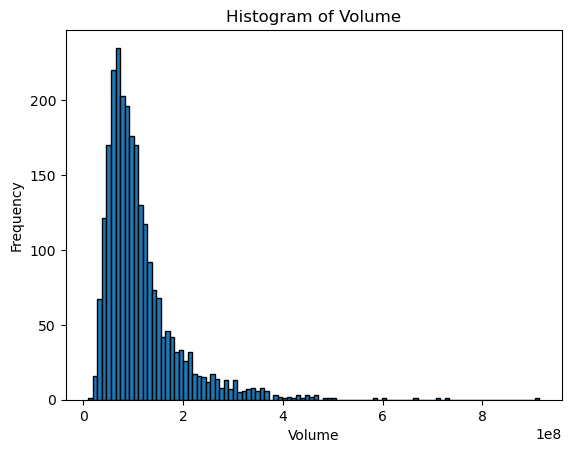

In [21]:
# Create Histogram of "Volume" column
plt.hist(prepped_data["Volume"], bins=100, edgecolor="black")

# Add title and labels
plt.title("Histogram of Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")

plt.show()

In [22]:
threshold = third_quartile_volume
current_column = "Volume"
value_being_checked = "trading Volume"
quartile_name = "Third"

print_results(threshold, current_column, quartile_name, value_being_checked)

threshold = median_volume
quartile_name = "Second"

print_results(threshold, current_column, quartile_name, value_being_checked)

threshold = first_quartile_volume
quartile_name = "First"

print_results(threshold, current_column, quartile_name, value_being_checked)

Results of analysis of data above the Third Quartile
Days above the Third Quartile trading Volume and gained value: 324
Days above the Third Quartile trading Volume and lost value: 305
The correlation between the Volume and Closing/Last price for data above the Third Quartile is -0.17357

Results of analysis of data above the Second Quartile
Days above the Second Quartile trading Volume and gained value: 628
Days above the Second Quartile trading Volume and lost value: 630
The correlation between the Volume and Closing/Last price for data above the Second Quartile is -0.16243

Results of analysis of data above the First Quartile
Days above the First Quartile trading Volume and gained value: 958
Days above the First Quartile trading Volume and lost value: 929
The correlation between the Volume and Closing/Last price for data above the First Quartile is -0.12697



In all three sets of data, there is a weak negative correlation that grows slowly weaker the more data you include in the analysis. This suggests that there is a slight tendency for the stock price to close at a lower price when there is increased trading volume. The correlation is weak enough that not a lot of conclusions can be drawn from the connection. 